In [17]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm

# Read the City and Ride Data
# Read CSV
city_dataframe = pd.read_csv("../Homework_5_Matplotlib/city_data.csv")
ride_dataframe = pd.read_csv("../Homework_5_Matplotlib//ride_data.csv")

# Combine the data into a single dataset
#combined_data = pd.merge(ride_data_to_load, city_data_to_load, on="city")

#drop one duplicate record with same city name, same ride_ids but different # of drivers
city_dataframe = city_dataframe.drop_duplicates('city', keep = 'first')

merged_dataframe = city_dataframe.merge(ride_dataframe, on = 'city')
#merged_dataframe.head()
# Display the data table for preview


In [18]:
by_city = merged_dataframe.groupby('city')
#by_city

In [19]:
Avgfare_by_city = by_city["fare"].mean()
#Avgfare_by_city

In [20]:
number_of_rides = by_city['ride_id'].count()
#number_of_rides

In [21]:
# Total Number of Drivers Per City
driver_percity=by_city.mean()['driver_count']
#driver_percity

In [22]:
# city type data
city_type = city_dataframe.set_index('city')['type']
#city_type

In [23]:
#put into dataframe
city_info = pd.DataFrame({
    "Number of Rides": number_of_rides,
    "Average Fare": Avgfare_by_city,
    "Number of Drivers": driver_percity,
    "Type of City": city_type
})

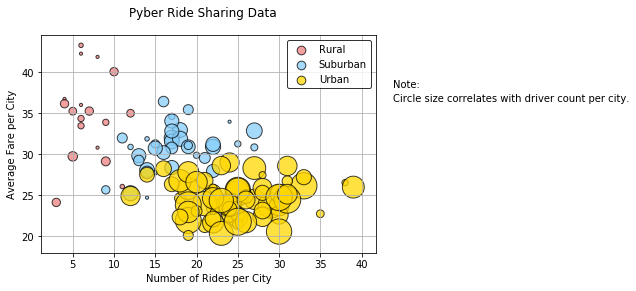

In [24]:
city_info.sort_values('Number of Drivers', ascending = False)

#separated dfs for city categories
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']


#color scheme dictionary and preview
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
#Color Dictionary 
city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

plt.suptitle('Pyber Ride Sharing Data')

# three scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
textstr = ('Note:')
plt.text(.94, 0.7, textstr, fontsize=10, transform=plt.gcf().transFigure)
textstr = ('Circle size correlates with driver count per city.')
plt.text(.94, 0.65, textstr, fontsize=10, transform=plt.gcf().transFigure)
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')



lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.grid(b=True)

plt.savefig('PyberRide.png', bbox_inches="tight")
plt.show()

## Bubble Plot of Ride Sharing Data

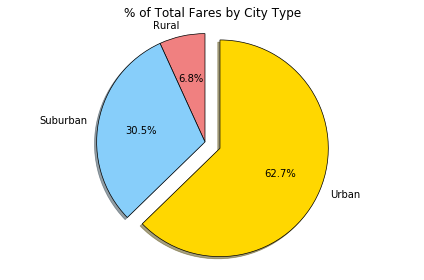

In [31]:
# Calculate Type Percents
#group by type to be used by all pie charts
type_percent = merged_dataframe.groupby('type')['type', 'fare', 'ride_id', 'driver_count','city']

#total fare by city
fare_by_city = type_percent.sum()['fare']

# Build Pie Chart
#pie chart build
labels = fare_by_city.index

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .15]
plt.pie(fare_by_city, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .7, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.tight_layout()

# Save Figure
plt.savefig('FarebyCityType.png', bbox_inches="tight")
plt.show()

## Total Rides by City Type

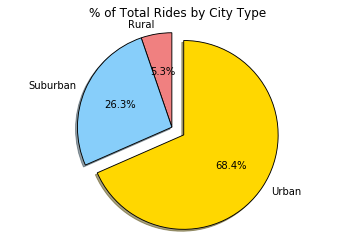

In [32]:
# Calculate Ride Percents, number of ride per city type
rides_by_city = type_percent.count()['ride_id']

#Build Pie Chart
labels = rides_by_city.index
plt.pie(rides_by_city, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .9, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')

#save figure
plt.savefig('RidesbyCity.png', bbox_inches="tight")
plt.show()

## Total Drivers by City Type

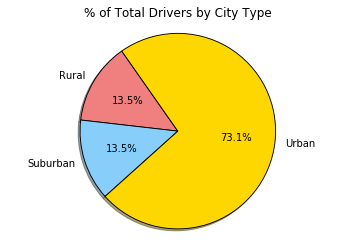

In [40]:
# Calculate Driver Percents
# of driver per city type
type_percent2 = merged_dataframe.groupby('type')['driver_count','city', 'type']
driver_sum = type_percent2.first()['driver_count']

# Build Pie Charts
labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .9, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')



# Save Figure
plt.savefig('DriversbyCity.png', bbox_inches="tight")
plt.show()

In [30]:
driver_sum.head(20)

type
Rural        7
Suburban     7
Urban       38
Name: driver_count, dtype: int64

In [35]:
type_percent2.head(20)

,driver_count,city
0,38,Richardfort
1,38,Richardfort
2,38,Richardfort
3,38,Richardfort
4,38,Richardfort
5,38,Richardfort
6,38,Richardfort
7,38,Richardfort
8,38,Richardfort
9,38,Richardfort


In [36]:
driver_sum.head(20)

city
Amandaburgh        12
Barajasview        26
Barronchester      11
Bethanyland        22
Bradshawfurt        7
Brandonfort        10
Carriemouth        52
Christopherfurt    41
Colemanland        23
Davidfurt          23
Deanville          49
East Aaronbury      7
East Danielview    22
East Kaylahaven    65
East Kentstad      20
East Marymouth      5
Erikaland          37
Garzaport           7
Grahamburgh        61
Grayville           2
Name: driver_count, dtype: int64

In [37]:
driver_sum[0]

12